# <center> **Digit Recognizer** </center>

**Link Competitions:** [Digit Recognizer](https://www.kaggle.com/competitions/digit-recognizer/)

**Vũ Khánh Nam**

***
## Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.utils import plot_model, to_categorical
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

**Using GPU**

In [2]:
tf.device('/GPU:0')
tf.debugging.set_log_device_placement(True)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:

/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 1650 with Max-Q Design, pci bus id: 0000:02:00.0, compute capability: 7.5




In [3]:
df_train = pd.read_csv('./Data/train.csv')
df_test = pd.read_csv('./Data/test.csv')

Y_train = df_train["label"]
X_train = df_train.drop("label", axis=1)

X_test = df_test

<Axes: xlabel='label', ylabel='count'>

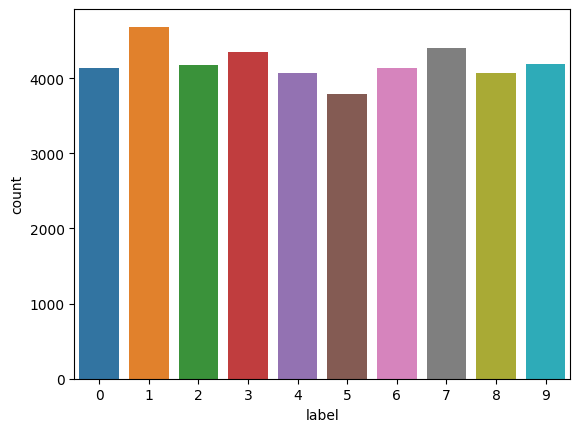

In [4]:
sns.countplot(data=df_train, x="label")

## Preprocessing

**Normalization**

In [5]:
X_train= X_train/255.0
X_test = X_test/255.0

**Reshape**

In [6]:
X_train= X_train.values.reshape(-1, 28, 28, 1).astype(np.float16)
X_test= X_test.values.reshape(-1, 28, 28, 1).astype(np.float16)

**One-hot encoding Y**

In [7]:
Y_train= to_categorical(Y_train, num_classes= 10)

## Split Train-set and Val-set

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size= 0.1, random_state= 0)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((37800, 28, 28, 1), (37800, 10), (4200, 28, 28, 1), (4200, 10))

## Training Model

In [15]:
model = Sequential(
    [
    Conv2D(filters= 64, kernel_size= (9, 9), padding= 'Same', activation= 'relu', input_shape= (28, 28, 1), name= "C1" ), 
    MaxPool2D(pool_size= (2,2), name= "P1"),
    Dropout(0.25, name= "D1"),
    BatchNormalization(),

    
    Conv2D(filters= 64, kernel_size= (7, 7), padding= 'Same', activation= 'relu', name= "C3"),
    MaxPool2D(pool_size= (2,2), name= "P2"),
    Dropout(0.25, name= "D2"),
    BatchNormalization(),

    
    Conv2D(filters= 64, kernel_size= (5, 5), padding= 'Same', activation= 'relu', name= "C4"),
    MaxPool2D(pool_size= (2,2), name= "P3"),
    Dropout(0.25, name= "D3"),
    BatchNormalization(),

    
    Conv2D(filters= 64, kernel_size= (3, 3), padding= 'Same', activation= 'relu', name= "C5"),
    MaxPool2D(pool_size= (2,2), name= "P4"),
    Dropout(0.25, name= "D4"),
    BatchNormalization(),
    
    Flatten(),
    Dense(34, activation= "relu", name= 'L1'),
    Dropout(0.25, name= "D5"),
    BatchNormalization(),
    
    Dense(10, activation= "linear", name= "L2")
    ], name= "CNN"
)
model.summary()

Model: "CNN"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 C1 (Conv2D)                 (None, 28, 28, 64)        5248      

                                                                 

 P1 (MaxPooling2D)           (None, 14, 14, 64)        0         

                                                                 

 D1 (Dropout)                (None, 14, 14, 64)        0         

                                                                 

 batch_normalization_5 (Batc  (None, 14, 14, 64)       256       

 hNormalization)                                                 

                                                                 

 C3 (Conv2D)                 (None, 14, 14, 64)        200768    

                                                                 

 P2 (MaxPooling2D)           (None, 7, 7, 64)          0         

                                               

In [16]:
batch_size = 128

datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range=0.10,
        width_shift_range=0.1,
        height_shift_range=0.1)

train_gen = datagen.flow(X_train, Y_train, batch_size=batch_size)

In [17]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(0.001),
    loss= tf.keras.losses.CategoricalCrossentropy(from_logits= True),
    metrics=['accuracy']
    )

history = model.fit(train_gen, 
                    epochs=100,
                    validation_data = (X_val, Y_val),
                    verbose=2
                    )

Epoch 1/100

296/296 - 10s - loss: 0.8765 - accuracy: 0.7363 - val_loss: 4.0127 - val_accuracy: 0.1476 - 10s/epoch - 33ms/step

Epoch 2/100

296/296 - 8s - loss: 0.2139 - accuracy: 0.9472 - val_loss: 0.4660 - val_accuracy: 0.8448 - 8s/epoch - 26ms/step

Epoch 3/100

296/296 - 8s - loss: 0.1323 - accuracy: 0.9675 - val_loss: 0.0626 - val_accuracy: 0.9805 - 8s/epoch - 26ms/step

Epoch 4/100

296/296 - 7s - loss: 0.1066 - accuracy: 0.9731 - val_loss: 0.0450 - val_accuracy: 0.9883 - 7s/epoch - 25ms/step

Epoch 5/100

296/296 - 8s - loss: 0.0847 - accuracy: 0.9787 - val_loss: 0.0323 - val_accuracy: 0.9905 - 8s/epoch - 26ms/step

Epoch 6/100

296/296 - 7s - loss: 0.0785 - accuracy: 0.9804 - val_loss: 0.0369 - val_accuracy: 0.9910 - 7s/epoch - 25ms/step

Epoch 7/100

296/296 - 8s - loss: 0.0749 - accuracy: 0.9813 - val_loss: 0.0329 - val_accuracy: 0.9912 - 8s/epoch - 25ms/step

Epoch 8/100

296/296 - 8s - loss: 0.0692 - accuracy: 0.9819 - val_loss: 0.0392 - val_accuracy: 0.9893 - 8s/epoch - 2

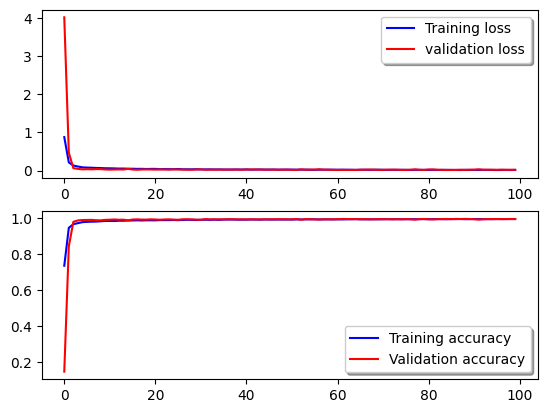

In [18]:
# Evaluate the model
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## Predict

In [19]:
pre_test = model.predict(X_test)
pre_test = tf.nn.softmax(pre_test)
pre_test = np.argmax(pre_test, axis=1)

875/875 [==============================] - 2s 2ms/step


In [20]:
output = pd.DataFrame({'ImageId': [i for i in range(1, len(X_test)+1)], 'Label': pre_test})
output.to_csv('submission.csv', index=False)
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
